# Iteratively annotate each region using a priority
- This notebook shows how you can annotate regions with pybedtools.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pybedtools
import numpy as np
from collections import OrderedDict
import os

In [2]:
# Just listing my own files so I know what annotations I have
input_dir = '/projects/ps-yeolab3/bay001/annotations/hg19/gencode_v19/'

! ls $input_dir

gencode.v19.annotation.basic.gtf
gencode.v19.annotation.basic.gtf.png
gencode.v19.annotation.gtf
gencode.v19.annotation.gtf.db
gencode.v19.lncRNA_transcripts.fa
gencode.v19.pc_transcripts.fa
gencode.v19.transcript.fa.1
gencode.v19.transcript.gtf.1
gencode.v19.transcripts.fa
generate_representative_encode_transcripts.ipynb
hg19_v19_basic_cds.bed
hg19_v19_basic_cds_and_three_prime_utrs.SAF
hg19_v19_basic_cds_and_three_prime_utrs.bed
hg19_v19_basic_cds_and_three_prime_utrs.subtract_basic_introns.bed
hg19_v19_basic_distintron500.bed
hg19_v19_basic_exons.bed
hg19_v19_basic_five_prime_utrs.bed
hg19_v19_basic_genes.bed
hg19_v19_basic_introns.bed
hg19_v19_basic_proxintron500.bed
hg19_v19_basic_three_prime_utrs.bed
hg19_v19_cds.bed
hg19_v19_cds.transcripts.HepG2_topENSTbyTPM.wnoncoding.tpm1.bed
hg19_v19_cds.transcripts.bed
hg19_v19_cds_and_three_prime_utrs.bed
hg19_v19_distintron500.bed
hg19_v19_distintron500.transcripts.bed
hg19_v19_exons.bed
hg19_v19_exons.transcripts.bed
hg19_v19_five_prime_

# Define annotation files (BED6 format). These files should describe gene-level or transcript-level regions.
- This can be parsed from a GTF/GFF annotation file
- This can also be downloaded from either UCSC's table browser or ENSEMBL's Biomart.

In [3]:
cds_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_cds.transcripts.bed'))
three_prime_utr_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_three_prime_utrs.transcripts.bed'))
five_prime_utr_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_five_prime_utrs.transcripts.bed'))
prox_intron_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_proxintron500.transcripts.bed'))
dist_intron_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_distintron500.transcripts.bed'))

# Define a BED6 file that you want annotated:
- This can be any BED6 file

In [4]:
# this can be any BED6 file
unannotated_bed_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20180205/hg19/IDR/204.01v02.IDR.out.0102merged.bed'
to_be_annotated = pybedtools.BedTool(unannotated_bed_file)

# First, intersect entries with the highest chosen priority region
- In this case, we're choosing CDS to be the highest priority (ie. if an entry overlaps both the CDS of transcript1 but also a UTR of transcript2, we'll choose CDS/tx1)
- Let's store these entries in: 

```
annotated_cds
```

# Then, use the -v flag to do a "reverse intersect," returning any entry that does NOT intersect a CDS.
- Let's store these entries in 

```
unannotated
```
- Let's also re-assign the 

```
unnannotated
``` 

entries to:

```
to_be_annotated
```

In [5]:
annotated_cds = to_be_annotated.intersect(cds_annotation, u=True, s=True).to_dataframe()
unannotated = to_be_annotated.intersect(cds_annotation, s=True, v=True).to_dataframe()
print(
    "Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file. ",
    annotated_cds.shape[0] + \
    unannotated.shape[0]
)

to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)

Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file.  7339


# The following cells are rinse/repeat for the rest of the entries. I've arbitrarily decided that the priority order for annotation is: CDS, 3'UTR, 5'UTR, proxintron, distintron (prox/dist = intronic positions less than/greater than 500nt away from an exon).

In [6]:
annotated_three_prime_utr = to_be_annotated.intersect(three_prime_utr_annotation, u=True, s=True).to_dataframe()
unannotated = to_be_annotated.intersect(three_prime_utr_annotation, s=True, v=True).to_dataframe()
print(
    "Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file. ",
    annotated_cds.shape[0] + \
    annotated_three_prime_utr.shape[0] + \
    unannotated.shape[0]
)

to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)

Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file.  7339


In [7]:
annotated_five_prime_utr = to_be_annotated.intersect(five_prime_utr_annotation, u=True, s=True).to_dataframe()
unannotated = to_be_annotated.intersect(five_prime_utr_annotation, s=True, v=True).to_dataframe()
print(
    "Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file. ",
    annotated_cds.shape[0] + \
    annotated_three_prime_utr.shape[0] + \
    annotated_five_prime_utr.shape[0] + \
    unannotated.shape[0]
)

to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)

Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file.  7339


In [8]:
annotated_proxintron = to_be_annotated.intersect(prox_intron_annotation, u=True, s=True).to_dataframe()
unannotated = to_be_annotated.intersect(prox_intron_annotation, s=True, v=True).to_dataframe()
print(
    "Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file. ",
    annotated_cds.shape[0] + \
    annotated_three_prime_utr.shape[0] + \
    annotated_five_prime_utr.shape[0] + \
    annotated_proxintron.shape[0] + \
    unannotated.shape[0]
)

to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)

Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file.  7339


In [9]:
annotated_distintron = to_be_annotated.intersect(dist_intron_annotation, u=True, s=True).to_dataframe()
unannotated = to_be_annotated.intersect(dist_intron_annotation, s=True, v=True).to_dataframe()
print(
    "Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file. ",
    annotated_cds.shape[0] + \
    annotated_three_prime_utr.shape[0] + \
    annotated_five_prime_utr.shape[0] + \
    annotated_proxintron.shape[0] + \
    annotated_distintron.shape[0] + \
    unannotated.shape[0]
)

to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)

Annotated + Unannotated entries. This should add up to the total number of entries in the unannotated BED6 file.  7339


# When finished annotating, look at the leftover unannotated entries on a genome browser to ensure that you're not missing anything.
- Always good practice to look at a few entries on the browser!

In [10]:
print(unannotated.shape[0])
unannotated.head()

69


,chrom,start,end,name,score,strand
0,chr20,62668107,62668191,39.183898,4.407180,+
1,chr5,180710526,180710608,11.790986,3.753058,+
2,chr11,859573,859645,14.381159,4.844781,-
3,chr7,72440377,72440482,6.106787,4.897991,-
4,chr20,62667793,62667926,400.000000,5.987712,+


# Since most of this code is the same, let's turn this into a loop

In [11]:
regions = OrderedDict(
    {
        'cds':cds_annotation,
        'utr3':three_prime_utr_annotation,
        'utr5':five_prime_utr_annotation,
        'proxintron':prox_intron_annotation,
        'distintron':dist_intron_annotation
    }
)

to_be_annotated = pybedtools.BedTool(unannotated_bed_file)
regions_dict = {}

for region, coordinates in regions.items():
    annotated = to_be_annotated.intersect(coordinates, u=True, s=True).to_dataframe()
    unannotated = to_be_annotated.intersect(coordinates, s=True, v=True).to_dataframe()
    regions_dict[region] = annotated
    print(
        "Events left to be annotated: {}".format(unannotated.shape[0])
    )
    to_be_annotated = pybedtools.BedTool.from_dataframe(unannotated)
    
print(unannotated.shape[0])
unannotated.head()

Events left to be annotated: 6993
Events left to be annotated: 6566
Events left to be annotated: 6279
Events left to be annotated: 2975
Events left to be annotated: 69
69


,chrom,start,end,name,score,strand
0,chr20,62668107,62668191,39.183898,4.407180,+
1,chr5,180710526,180710608,11.790986,3.753058,+
2,chr11,859573,859645,14.381159,4.844781,-
3,chr7,72440377,72440482,6.106787,4.897991,-
4,chr20,62667793,62667926,400.000000,5.987712,+


# Each dataframe generated is stored in the regions_dict{}

In [12]:
regions_dict['cds']

,chrom,start,end,name,score,strand
0,chr11,118984416,118984526,6.894678,4.810281,+
1,chr17,79987346,79987424,6.061249,3.356835,+
2,chr20,61915198,61915233,84.310443,6.136575,+
3,chr11,1775399,1775475,5.306684,4.946639,-
4,chr16,28847558,28847584,400.000000,4.673242,+
...,...,...,...,...,...,...
341,chr1,44820539,44820591,5.558435,3.899280,-
342,chr10,103589610,103589651,4.010876,3.776724,-
343,chr21,34941850,34941894,6.132100,3.024328,+
344,chr4,114468798,114468902,13.192881,4.785826,-


# Finally, let's plot the distribution of regions in a pie chart:

In [13]:
regions = {
    'cds':regions_dict['cds'].shape[0],
    '3utr':regions_dict['utr3'].shape[0],
    '5utr':regions_dict['utr5'].shape[0],
    'proxintron':regions_dict['proxintron'].shape[0],
    'distintron':regions_dict['distintron'].shape[0],
    'other':unannotated.shape[0],
}
regions = pd.DataFrame(regions, index=['regions']).T
regions

,regions
cds,346
3utr,427
5utr,287
proxintron,3304
distintron,2906
other,69


(-1.0999975378619686,
 1.099999882755332,
 -1.0999929110494115,
 1.0999994623969889)

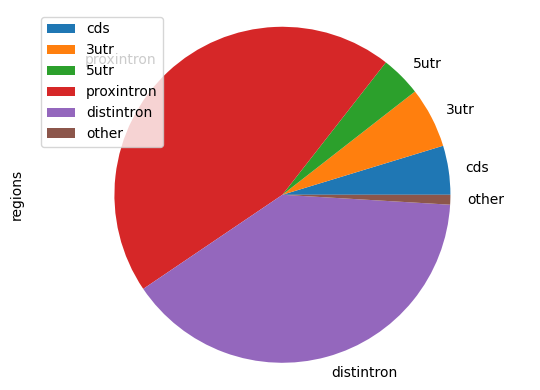

In [14]:
fig, ax = plt.subplots()
regions.plot(kind='pie', ax=ax, y='regions')
ax.axis('equal')

# If you want to "extend" regions, use "slop":
- b extends both sides
- l extends from the start
- r extends from the end

In [15]:
chrom_sizes = '/projects/ps-yeolab3/bay001/annotations/hg19/hg19.chrom.sizes'
three_prime_utr_annotation = pybedtools.BedTool(os.path.join(input_dir, 'hg19_v19_three_prime_utrs.transcripts.bed'))
three_prime_utr_annotation.to_dataframe().head()

,chrom,start,end,name,score,strand
0,chr1,70005,70008,ENST00000335137.3,0,+
1,chr1,137620,138532,ENST00000423372.3,0,-
2,chr1,134900,135802,ENST00000423372.3,0,-
3,chr1,368594,368634,ENST00000426406.1,0,+
4,chr1,621058,621098,ENST00000332831.2,0,-


In [16]:
three_prime_utr_annotation.slop(g=chrom_sizes, b=500).to_dataframe().head()

,chrom,start,end,name,score,strand
0,chr1,69505,70508,ENST00000335137.3,0,+
1,chr1,137120,139032,ENST00000423372.3,0,-
2,chr1,134400,136302,ENST00000423372.3,0,-
3,chr1,368094,369134,ENST00000426406.1,0,+
4,chr1,620558,621598,ENST00000332831.2,0,-
